# Tasks for section E
***

* [Task 1](#first-task)
* [Task 2](#second-task)
* [Task 3](#third-task)

# Task 1: NYC Tracts <a class="anchor" id="first-task"></a>

* Create a contiguity matrix using the queen criterion
* Let’s focus on Central Park. The corresponding polygon is ID 142. _How many neighbors does it have?_
* Try to reproduce the [zoom plot in the previous section](https://darribas.org/gds_course/content/bE/lab_E.html#lab-e-queen-zoom).
* Create a block spatial weights matrix where every tract is connected to other tracts in the same borough. For that, use the borocode column of the nyc table.
* Compare the number of neighbors by tract for the two weights matrices, _which one has more? why?_


In [9]:
%matplotlib inline

import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


import geopandas as gpd
import contextily as cx
import pysal
import libpysal
from pysal.lib import examples
from pysal.lib import weights
from libpysal.io import open as psopen

from libpysal.examples import load_example

In [4]:
# Load example (this automatically downloads if not available)
nyc_data = examples.load_example("NYC Socio-Demographics")
# Print the paths to all the files in the dataset
nyc_data.get_file_list()

['/Users/marcosdemetry/pysal_data/NYC_Socio-Demographics/NYC_Tract_ACS2008_12.prj',
 '/Users/marcosdemetry/pysal_data/NYC_Socio-Demographics/__MACOSX/._NYC_Tract_ACS2008_12.shx',
 '/Users/marcosdemetry/pysal_data/NYC_Socio-Demographics/__MACOSX/._NYC_Tract_ACS2008_12.shp',
 '/Users/marcosdemetry/pysal_data/NYC_Socio-Demographics/__MACOSX/._NYC_Tract_ACS2008_12.dbf',
 '/Users/marcosdemetry/pysal_data/NYC_Socio-Demographics/__MACOSX/._NYC_Tract_ACS2008_12.prj',
 '/Users/marcosdemetry/pysal_data/NYC_Socio-Demographics/NYC_Tract_ACS2008_12.shx',
 '/Users/marcosdemetry/pysal_data/NYC_Socio-Demographics/NYC_Tract_ACS2008_12.shp',
 '/Users/marcosdemetry/pysal_data/NYC_Socio-Demographics/NYC_Tract_ACS2008_12.dbf']

<AxesSubplot:>

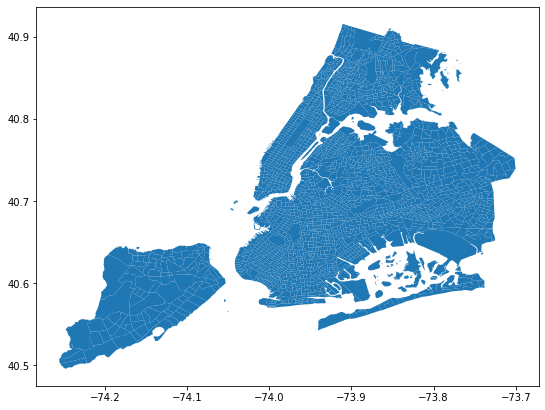

In [5]:
nyc = gpd.read_file(nyc_data.get_path("NYC_Tract_ACS2008_12.shp"))
nyc.plot(figsize=(9, 9))

## Creating contiguity matrix using the queen criterion

In [91]:
w_queen = weights.Queen.from_dataframe(nyc)
w_queen

/Users/marcosdemetry/opt/anaconda3/lib/python3.7/site-packages/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 7 disconnected components.
 There are 3 islands with ids: 0, 626, 2165.
  warnings.warn(message)


In [111]:
nyc['geo_name'][141]

'Census Tract 142, New York city (part), Manhattan borough, New York County, New York'

In [93]:
print(f"Central Park has {len(w_queen.neighbors[142])} neighbors. They are {w_queen.neighbors[142]}.")

Central Park has 30 neighbors. They are [192, 130, 195, 199, 137, 204, 141, 145, 151, 152, 153, 156, 222, 161, 165, 166, 167, 171, 187, 110, 111, 174, 175, 114, 179, 180, 181, 183, 123, 191].


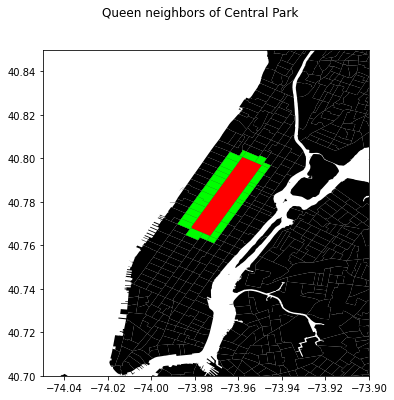

In [94]:
# Setup figure
f, ax = plt.subplots(1, figsize=(6, 6))
# Plot base layer of polygons
nyc.plot(ax=ax, facecolor='k', linewidth=0.1)
# Select focal polygon
focus = nyc.loc[[142], ['geometry']]
# Plot focal polygon
focus.plot(facecolor='red', alpha=1, linewidth=0, ax=ax)
# Plot neighbors
neis = nyc.loc[w_queen[142], :]
neis.plot(ax=ax, facecolor='lime', linewidth=0)
# Title
f.suptitle("Queen neighbors of Central Park")
# Style and display on screen
ax.set_ylim(40.7, 40.85)
ax.set_xlim(-74.05, -73.9)
plt.show()

### Block Weights

In [54]:
w_block = weights.block_weights(nyc['borocode'])

/Users/marcosdemetry/opt/anaconda3/lib/python3.7/site-packages/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 5 disconnected components.
  warnings.warn(message)


In [56]:
w_block.remap_ids(nyc.index)

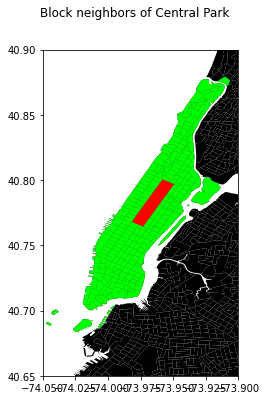

In [61]:
# Setup figure
f, ax = plt.subplots(1, figsize=(6, 6))
# Plot base layer of polygons
nyc.plot(ax=ax, facecolor='k', linewidth=0.1)
# Select focal polygon
focus = nyc.loc[[142], ['geometry']]
# Plot focal polygon
focus.plot(facecolor='red', alpha=1, linewidth=0, ax=ax)
# Plot neighbors
neis = nyc.loc[w_block[142], :]
neis.plot(ax=ax, facecolor='lime', linewidth=0)
# Title
f.suptitle("Block neighbors of Central Park")
# Style and display on screen
ax.set_ylim(40.65, 40.9)
ax.set_xlim(-74.05, -73.9)
plt.show()

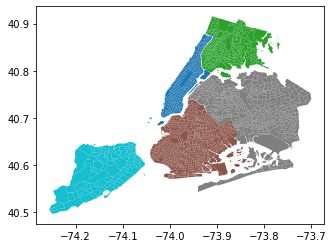

In [99]:
nyc.plot(column='borocode', categorical=True);

## Comparing Number of Neighbors between Queen and Block Weights

In [75]:
queen_card = pd.Series(w_queen.cardinalities)
block_card = pd.Series(w_block.cardinalities)

<AxesSubplot:>

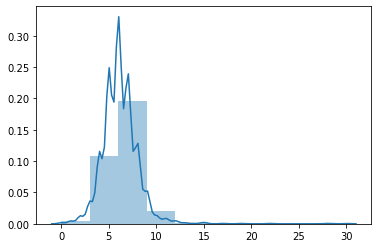

In [96]:
sns.distplot(queen_card, bins=10, label="Queen")

<AxesSubplot:>

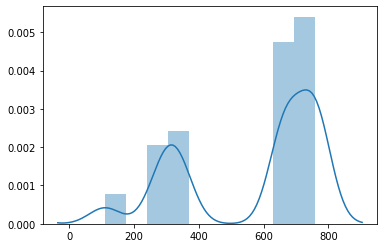

In [97]:
sns.distplot(block_card, bins=10)

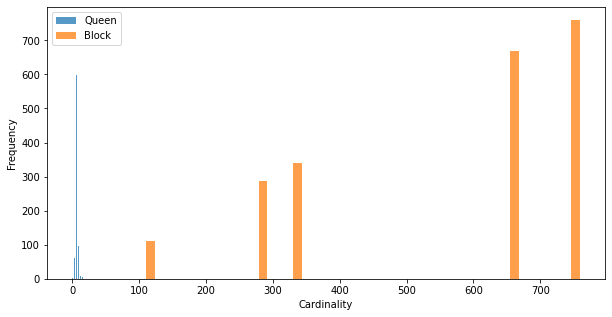

In [113]:
ax = queen_card.plot.hist(bins=50, alpha=0.75, label="Queen", figsize=(10, 5))

block_card.plot.hist(bins=50, alpha=0.75, ax=ax, label="Block")

ax.set_xlabel("Cardinality")
ax.legend();

# Task 2: Japanese Cities <a class="anchor" id="second-task"><a/>

In [114]:
jp_cities = geopandas.read_file("http://www.oecd.org/cfe/regionaldevelopment/Japan.zip")
jp_cities.head()

,fuacode_si,fuaname,fuaname_en,class_code,iso3,name,geometry
0,JPN19,Kagoshima,Kagoshima,3.0,JPN,Japan,"MULTIPOLYGON Z (((130.67888 31.62931 0.00000, ..."
1,JPN20,Himeji,Himeji,3.0,JPN,Japan,"MULTIPOLYGON Z (((134.51537 34.65958 0.00000, ..."
2,JPN50,Hitachi,Hitachi,3.0,JPN,Japan,"POLYGON Z ((140.58715 36.94447 0.00000, 140.61..."
3,JPN08,Hiroshima,Hiroshima,3.0,JPN,Japan,"MULTIPOLYGON Z (((132.29648 34.19932 0.00000, ..."
4,JPN03,Toyota,Toyota,4.0,JPN,Japan,"MULTIPOLYGON Z (((137.04096 34.73242 0.00000, ..."


In [118]:
jp_cities.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [126]:
jp = jp_cities.to_crs(epsg=2459)

In [127]:
jp.crs

<Projected CRS: EPSG:2459>
Name: JGD2000 / Japan Plane Rectangular CS XVII
Axis Info [cartesian]:
- X[north]: Northing (metre)
- Y[east]: Easting (metre)
Area of Use:
- name: Japan - zone XVII
- bounds: (131.12, 24.4, 131.38, 26.01)
Coordinate Operation:
- name: Japan Plane Rectangular CS zone XVII
- method: Transverse Mercator
Datum: Japanese Geodetic Datum 2000
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [128]:
jp.geometry = jp.geometry.centroid

<AxesSubplot:>

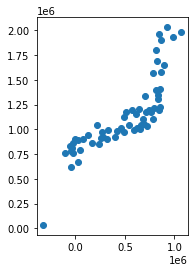

In [129]:
jp.plot()

With these at hand, tackle the following challenges:

* Generate a spatial weights matrix with five nearest neighbors
* Generate a spatial weights matrix with a 100km distance band
* Compare the two in terms of average number of neighbors. What are the main differences you can spot? In which cases do you think one criterion would be preferable over the other?

### Spatial Weights Matrix with five nearest neighbors

In [130]:
knn5 = weights.KNN.from_dataframe(jp, k=5)
knn5

In [131]:
# Extract centroids
cents = jp.centroid
# Extract coordinates into an array
pts = pd.DataFrame({"X": cents.x,
                    "Y": cents.y
                   }).values
# Compute KNN weights
knn5_from_pts = weights.KNN.from_array(pts, k=5)
knn5_from_pts

### Spatial Weights Matrix with a 100km distance band

In [143]:
w_dist1kmB = weights.DistanceBand.from_dataframe(jp, 100000)

/Users/marcosdemetry/opt/anaconda3/lib/python3.7/site-packages/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 9 disconnected components.
 There are 4 islands with ids: 14, 17, 30, 54.
  warnings.warn(message)


In [144]:
w_dist1kmC = weights.DistanceBand.from_dataframe(jp, 100000, binary=False)

/Users/marcosdemetry/opt/anaconda3/lib/python3.7/site-packages/scipy/sparse/data.py:119: RuntimeWarning: divide by zero encountered in reciprocal
  return self._with_data(data ** n)


### Tokyo

Focus on Tokyo (find the row in the table through a query search as we saw when considering Index-based queries) and the 100km spatial weights generated above. Try to create a figure similar to the one in the lecture. Here’s a recipe:

* Generate a buffer of 100Km around the Tokyo centroid
* Start the plot with the Tokyo urban area polygon (jp_cities) in one color (e.g. red)
* Add its neighbors in, say blue
* Add their centroids in a third different color
* Layer on top the buffer, making sure only the edge is colored
* [Optional] Add a basemap

In [157]:
jp_cities[jp_cities["fuaname"]=="Tokyo"]

,fuacode_si,fuaname,fuaname_en,class_code,iso3,name,geometry
32,JPN01,Tokyo,Tokyo,4.0,JPN,Japan,"MULTIPOLYGON Z (((139.69215 35.41008 0.00000, ..."


In [167]:
tokyo = jp_cities[jp_cities["fuaname"]=="Tokyo"].index[0]

/Users/marcosdemetry/opt/anaconda3/lib/python3.7/site-packages/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 9 disconnected components.
 There are 4 islands with ids: 14, 17, 30, 54.
  warnings.warn(message)


<AxesSubplot:>

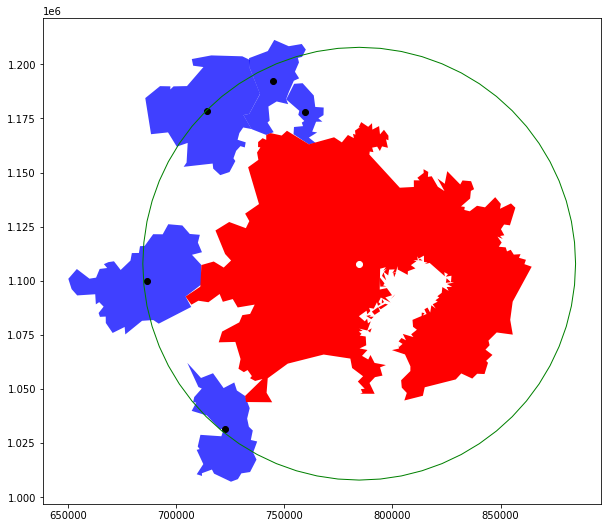

In [179]:
w = weights.DistanceBand.from_dataframe(jp, 100000)
buff = jp.loc[[tokyo], :].buffer(100000)
neis_df = jp_cities.loc[w.neighbors[tokyo]].to_crs(jp.crs)

# Plot neighbors in blue
ax = neis_df.plot(color="blue", alpha=0.75, figsize=(10, 10))

# Plot Tokyo in red
jp_cities.to_crs(jp.crs).loc[[tokyo], :].plot(ax=ax, color="red")

# Plot Tokyo centroid in white
jp_cities.to_crs(jp.crs).loc[[tokyo], :].centroid.plot(ax=ax, color="white")

# Plot neighbor centroids in black
neis_df.centroid.plot(ax=ax, color="black")

# Plot buffer in green
buff.plot(ax=ax, facecolor="none", edgecolor="green")

# Task 3

Using the AHAH dataset, create the spatial lag of the overall score, and generate a Moran plot. Can you tell any overall pattern? What do you think it means?

In [1]:
import os
from pathlib import Path

In [6]:
cwd = os.getcwd()
root = Path(cwd).parents[0].parents[0]
D_dir = str(Path(root)) + '/Hand-Ins/bD/'
#datadir = str(Path(root)) + str('/data')
#outputdir = str(Path(root)) + str('/figures')
print("Root: " + str(root))

Root: /Users/marcosdemetry/Dropbox/IFN/Programming/Python_projects/GDS-Course


In [11]:
os.chdir(D_dir)
lsoas = gpd.read_file("data/Access_to_Healthy_Assets_and_Hazards_AHAH/Local_Authority_Districts/E08000012/shapefiles/E08000012.shp")
ahah_data = pd.read_csv("data/Access_to_Healthy_Assets_and_Hazards_AHAH/Local_Authority_Districts/E08000012/tables/E08000012.csv")
ahah = lsoas.join(ahah_data.set_index("lsoa11cd"), on="lsoa11cd")
os.chdir(cwd)

In [12]:
ahah.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 298 entries, 0 to 297
Data columns (total 51 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   lsoa11cd      298 non-null    object  
 1   geometry      298 non-null    geometry
 2   lsoa11nm      298 non-null    object  
 3   r_rank        298 non-null    int64   
 4   h_rank        298 non-null    int64   
 5   g_rank        298 non-null    int64   
 6   e_rank        298 non-null    int64   
 7   r_exp         298 non-null    float64 
 8   h_exp         298 non-null    float64 
 9   g_exp         298 non-null    float64 
 10  e_exp         298 non-null    float64 
 11  ahah          298 non-null    float64 
 12  r_ahah        298 non-null    int64   
 13  d_ahah        298 non-null    int64   
 14  r_dec         298 non-null    int64   
 15  h_dec         298 non-null    int64   
 16  g_dec         298 non-null    int64   
 17  e_dec         298 non-null    int64   
 18  gp

In [13]:
w_queen = weights.Queen.from_dataframe(ahah, idVariable="lsoa11cd")
ahah["area"] = np.log(ahah.area)

# Row-standardize the queen matrix
w_queen.transform = 'R'
# Compute spatial lag of `area`
w_queen_score = weights.lag_spatial(w_queen, ahah["area"])

ahah['w_area'] = w_queen_score

## Moran Plot (Unstandardized)

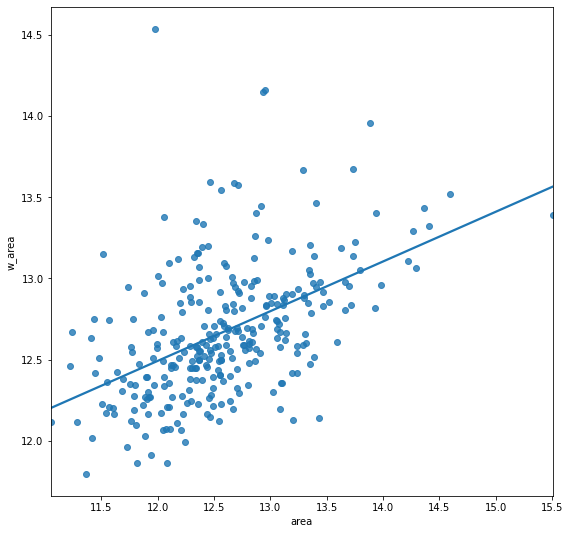

In [18]:
# Setup the figure and axis
f, ax = plt.subplots(1, figsize=(9, 9))
# Plot values
sns.regplot(x="area", y="w_area", data=ahah, ci=None)
# Display
plt.show()

## Moran Plot (Standardized)

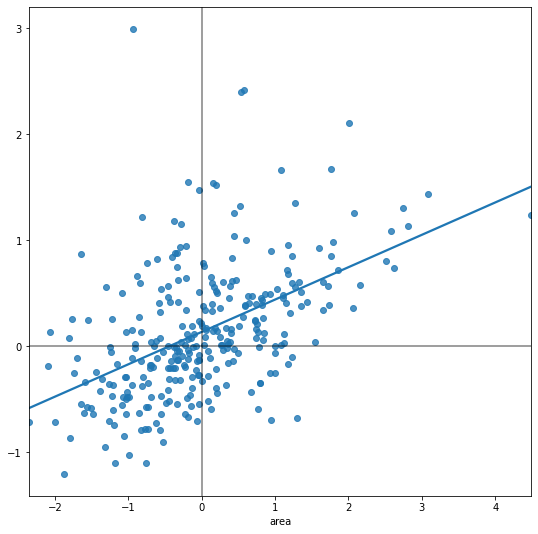

In [19]:
# Standardize the area
std_ahah = (ahah['area'] - ahah['area'].mean()) / ahah['area'].std()
# Compute the spatial lag of the standardized version and save is as a 
# Series indexed as the original variable
std_w_ahah = pd.Series(weights.lag_spatial(w_queen, std_ahah), index=std_ahah.index)
# Setup the figure and axis
f, ax = plt.subplots(1, figsize=(9, 9))
# Plot values
sns.regplot(x=std_ahah, y=std_w_ahah, ci=None)
# Add vertical and horizontal lines
plt.axvline(0, c='k', alpha=0.5)
plt.axhline(0, c='k', alpha=0.5)
# Display
plt.show()

The Moran Plot shows the spatial lag of the average value of the areas of the polygons. The plot shows us spatial autocorrelation between the areas of polygons. In this case, we are plotting polygon areas against polygon areas' lags.